In [1]:
# Import Dependencies
import warnings
warnings.filterwarnings('ignore')
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func
#Use SQLAlchemy create_engine to connect to your sqlite database.
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import create_engine, inspect, func,Column, Integer, String, Float

import matplotlib
from matplotlib import style
#style.use('seaborn')
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np

In [2]:
#start date June 1 - 15th 2020

engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [3]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [4]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [5]:
#engine.execute('SELECT date, prcp FROM measurement where measurement.date > "2016-08-23" ').fetchall()


In [33]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement

session = Session(engine)

In [31]:
q = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= dt.date(2016,8,23)).all()


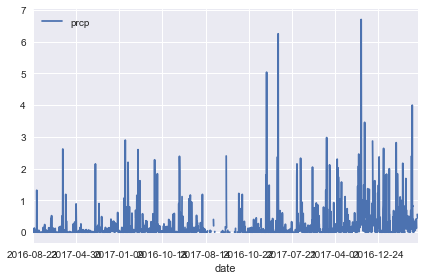

In [21]:
df_station_prcp = pd.DataFrame(q, columns=['date', 'prcp'])
df_station_prcp.set_index('date', inplace=True)

df_station_prcp.plot()
plt.tight_layout()
plt.show()



In [11]:
# Create Surfer and Board classes
# ----------------------------------
# class Station(Base):
#     __tablename__ = 'hawii_measurements'
#     #id = Column(Integer, primary_key=True)
#     station = Column(String(255),primary_key=True)
#     date = Column(String(255))
#     prcp = Column(Integer)
#     tobs = Column(Integer)

# class Measurement(Base):
#     __tablename__ = 'hawii_stations'
#    # id = Column(Integer, primary_key=True)
#     station = Column(String(255),primary_key=True)
#     name = Column(String(255))
#     latitude = Column(Float(255))
#     longitude = Column(Float(255))
#     elevation = Column(Integer)

In [12]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [25]:
#Design a query to calculate the total number of stations.
unique_stations = engine.execute('SELECT distinct station FROM station').fetchall()
unique_stations_df = pd.DataFrame(unique_stations)
unique_stations_df

,0
0,USC00519397
1,USC00513117
2,USC00514830
3,USC00517948
4,USC00518838
5,USC00519523
6,USC00519281
7,USC00511918
8,USC00516128


In [30]:
combined = engine.execute('SELECT b.station, a.name, b.date, b.prcp, b.tobs, a.latitude, a.longitude, a.elevation FROM measurement b join station a on a.station =  b.station ').fetchall()


In [29]:
Base2 = automap_base()
Base2.prepare(engine, reflect=True)
station = Base2.classes.station

In [28]:
import datetime as dt
p = session.query(Measurement.station, Measurement.tobs).filter(Measurement.date >= dt.date(2016,8,23)).all()



In [17]:
df_station_tobs = pd.DataFrame(p)
#df.set_index(Measurement.tobs, inplace=True, )

df_station_tobs.head(10)

,station,tobs
0,USC00519397,81.0
1,USC00519397,79.0
2,USC00519397,80.0
3,USC00519397,79.0
4,USC00519397,77.0
5,USC00519397,78.0
6,USC00519397,78.0
7,USC00519397,79.0
8,USC00519397,80.0
9,USC00519397,81.0


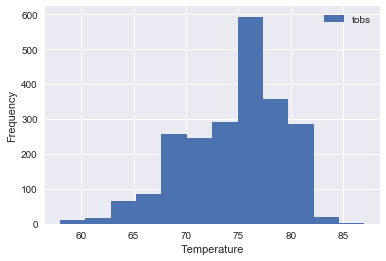

In [18]:
#Plot the results as a histogram with bins=12.
df_station_tobs.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.show()



In [50]:
min_avg_max = session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).filter(Measurement.date >= dt.date(2016,8,23)).all()
df_min_avg_max = pd.DataFrame(blah,columns=['TMIN', 'TAVG', 'TMAX'])
df_min_avg_max

,TMIN,TAVG,TMAX
0,58.0,74.590583,87.0


In [51]:
from flask import Flask, jsonify
app = Flask(__name__)
@app.route("/")
def welcome():
    return (
        f"/api/v1.0/precipitation"
        f"/api/v1.0/stations"
        f"/api/v1.0/tobs"
        f"/api/v1.0/<start>"
        f"/api/v1.0/<start>/<end>"
    )

@app.route("/api/v1.0/precipitation")
def jsonified():
    return jsonify(df_station_prcp)

@app.route("/api/v1.0/stations")
def distinct_stations():
    return jsonify(unique_stations_df)

@app.route("/api/v1.0/tobs")
def active_stations():
    return jsonify(df_station_tobs)

@app.route("/api/v1.0/<start>")
def temp_start():
    
    
    return jsonify(df_min_avg_max)

if __name__ == "__main__":
    app.run(debug=True, port=0)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:54188/ (Press CTRL+C to quit)
 * Restarting with stat


SystemExit: 1